In [70]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [71]:
plt.rcParams.update({"text.usetex": False,
                     "font.size": 20,
                     "pdf.fonttype": 42,
                     "ps.fonttype": 42})

In [72]:
target_latency = 150

In [73]:

local_df = pd.read_csv("../measurements_bev/local_test/map.csv")
root_folder = "../measurements_bev/static_test_50/"
mag_folder = "../measurements_bev/test_ltl_15_1/"


map_df = pd.read_csv(root_folder+"map.csv")
cha_df = pd.read_csv(root_folder+"characteristic.csv")
cha_df2= pd.read_csv(mag_folder+"characteristic.csv")
mag_df = pd.read_csv(mag_folder+"manager.csv")
tim_df = pd.read_csv(root_folder+"time.csv")

# cal_time = []
# for i in range(len(tim_df)):
#     if tim_df["technique"][i] == 2:
#         cal_time.append(tim_df["compression_time"][i]/32)
#     elif tim_df["technique"][i] == 3:
#         cal_time.append(tim_df["compression_time"][i]-50)
#     else:
#         cal_time.append(tim_df["compression_time"][i])
# tim_df["compression_time"] = cal_time

tim_df["transmission_time"] = cha_df["datasize_est"]*8/cha_df2["bandwidth"]*1000
tim_df["overall_est"] = tim_df["model_head_time"]*10+tim_df["model_tail_time"]+tim_df["framework_head_time"]+tim_df["framework_tail_time"] + tim_df["compression_time"]+tim_df["decompression_time"]+ tim_df["transmission_time"]

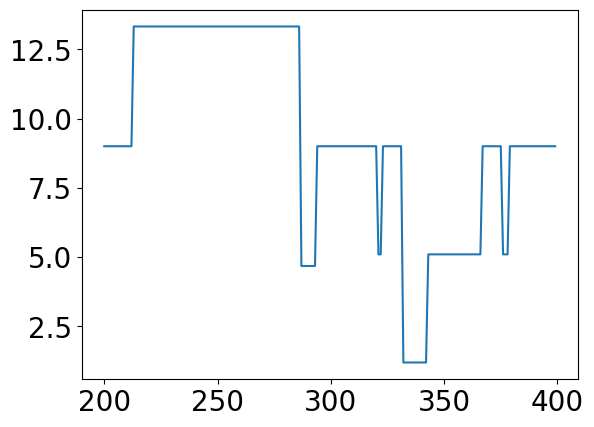

In [74]:
plt.plot(cha_df2["bandwidth"][200:]/1e6)

In [75]:
drops = []

for i in range(400):
    try:
        d = mag_df[mag_df["frame_id"]==i+1]["drop"].tolist()[0]
        if d >0.4:
            d=0.4
        drops.append(d)
    except:
        drops.append(drops[-1])


df = pd.DataFrame()
df["traget_drops"] = drops

In [76]:
df["map_drop"] = local_df["map"] - map_df["map"]
df["sen_drop"] = local_df["sensitivity"] - map_df["sensitivity"]
df["overall_time"]= tim_df["overall_est"] 

In [77]:
df

,traget_drops,map_drop,sen_drop,overall_time
0,0.3,0.020908,0.000000,2626.002773
1,0.3,0.039550,0.066667,115.381883
2,0.3,0.410118,0.076923,114.628793
3,0.3,0.240919,0.062500,113.708529
4,0.3,0.031515,0.000000,114.796306
...,...,...,...,...
395,0.4,0.561229,0.166667,113.386013
396,0.4,0.016224,-0.133333,113.588726
397,0.4,0.120367,0.000000,113.247117
398,0.4,0.142602,0.000000,112.614205


In [78]:
cha_df.head()

,pruning_thresh,quality,technique,bandwidth,drop,frame_id,sparsity,decomposability,regularity,pictoriality,compression_ratio,datasize_est,datasize_real,reconstruct_snr,target_cmp,target_snr,consumed_bw
0,0,40,1,6000000.0,0.3,1,0.0,-1,-1,-1,42.535578,8137,8881,5.032129,-1,-1,1.148753e+06
1,0,40,1,6000000.0,0.3,2,0.0,-1,-1,-1,43.134596,8024,8768,-0.242385,-1,-1,1.132800e+06
2,0,40,1,6000000.0,0.3,3,0.0,-1,-1,-1,52.457108,6598,7342,-5.218869,-1,-1,9.314824e+05
3,0,40,1,6000000.0,0.3,4,0.0,-1,-1,-1,50.824082,6810,7554,-7.777514,-1,-1,9.614118e+05
4,0,40,1,6000000.0,0.3,5,0.0,-1,-1,-1,42.862167,8075,8819,-9.771354,-1,-1,1.140000e+06


In [79]:
# tim_df["head_est"] = tim_df["head_time"]*10
# tim_df["ser_est"] = tim_df["serialize_time"]*10
# tim_df["tran_est"] = map_df["datasize"] / cha_df["bandwidth"] *1000
# df["overall_time"] = tim_df["head_est"] + tim_df["ser_est"] +tim_df["tran_est"]+tim_df["tail_time"]

In [80]:
df = df[200:]
df

,traget_drops,map_drop,sen_drop,overall_time
200,0.4,0.156952,0.000000,114.358178
201,0.4,0.225259,0.238095,117.694379
202,0.4,0.021453,0.000000,117.555171
203,0.4,0.692582,0.357143,114.360624
204,0.4,0.203515,0.117647,114.854488
...,...,...,...,...
395,0.4,0.561229,0.166667,113.386013
396,0.4,0.016224,-0.133333,113.588726
397,0.4,0.120367,0.000000,113.247117
398,0.4,0.142602,0.000000,112.614205


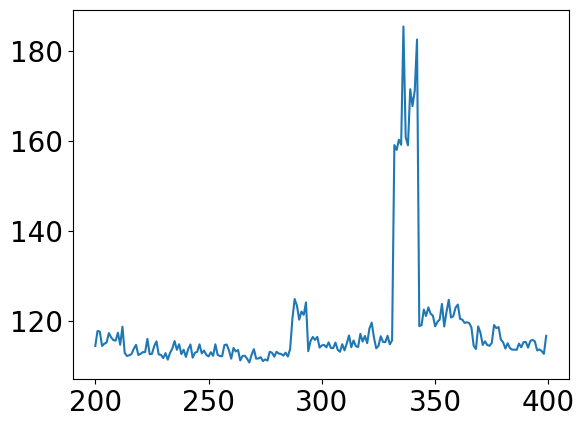

In [81]:
plt.plot(df["overall_time"])

In [82]:
df.std()

traget_drops     0.000000
map_drop         0.180178
sen_drop         0.124489
overall_time    12.359775
dtype: float64

In [83]:
good_df = df[df["map_drop"]<df["traget_drops"]]
good_df= good_df[good_df["sen_drop"]<good_df["traget_drops"]]
# good_df= good_df[good_df["bw_com"]<good_df["bandwidth"]]
good_df= good_df[good_df["overall_time"]<target_latency]

In [84]:
len(good_df)/200

0.765